# **Requirements**

In [ ]:
!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# **Convolutional Neural Network**


 

---



Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image Resize

In [ ]:
IMAGE_SIZE = [224, 224]

Import the dataset

In [ ]:
train_path = '/content/drive/MyDrive/Covid19/train'
test_path = '/content/drive/MyDrive/Covid19/test'

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Covid19/train/*')
folders

['/content/drive/MyDrive/Covid19/train/affected',
 '/content/drive/MyDrive/Covid19/train/not affected']

Model creation

In [ ]:
### Create Model from scratch using CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))

# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))

# Adding second Pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Adding a third convolutional layer
cnn.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))

# Adding third Pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(500,activation="relu"))

# Step 5 - Dropout to deal with overfitting
cnn.add(Dropout(0.2))

# Step 6 - Output Layer
cnn.add(Dense(len(folders),activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

Choose the best parameters

In [ ]:
cnn.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Use the Image Data Generator to import the images from the dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Covid19/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2400 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Covid19/test',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 600 images belonging to 2 classes.


**fit the model**

In [ ]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = train_set, validation_data = test_set, epochs = 50)

Epoch 1/50
150/150 [==============================] - 1173s 8s/step - loss: 0.3064 - accuracy: 0.9000 - val_loss: 0.2230 - val_accuracy: 0.9417
Epoch 2/50
150/150 [==============================] - 141s 938ms/step - loss: 0.0871 - accuracy: 0.9746 - val_loss: 0.0741 - val_accuracy: 0.9683
Epoch 3/50
150/150 [==============================] - 140s 931ms/step - loss: 0.0880 - accuracy: 0.9721 - val_loss: 0.0582 - val_accuracy: 0.9817
Epoch 4/50
150/150 [==============================] - 140s 931ms/step - loss: 0.0702 - accuracy: 0.9754 - val_loss: 0.0984 - val_accuracy: 0.9617
Epoch 5/50
150/150 [==============================] - 140s 932ms/step - loss: 0.0538 - accuracy: 0.9842 - val_loss: 0.0773 - val_accuracy: 0.9750
Epoch 6/50
150/150 [==============================] - 140s 932ms/step - loss: 0.0605 - accuracy: 0.9783 - val_loss: 0.1607 - val_accuracy: 0.9567
Epoch 7/50
150/150 [==============================] - 140s 931ms/step - loss: 0.0673 - accuracy: 0.9787 - val_loss: 0.1633 - v

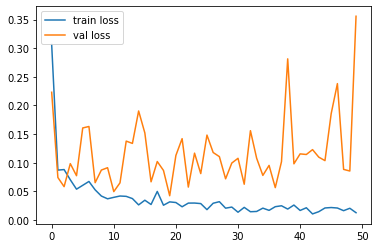

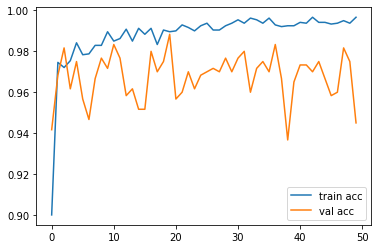

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Save it as a h5 file**

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('model_cnn.h5')

Apply model on test set

In [ ]:
y_pred = cnn.predict(test_set)

In [ ]:
y_pred

array([[1.9654254e-15, 1.0000000e+00],
       [5.8163350e-06, 9.9999416e-01],
       [3.4272933e-20, 1.0000000e+00],
       ...,
       [9.2627281e-01, 7.3727168e-02],
       [9.9999964e-01, 3.7463840e-07],
       [1.2652876e-20, 1.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,

In [ ]:
model=load_model('model_cnn.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Covid19/test/not affected/NORMAL_1219.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[  2.,   2.,   2.],
        [248., 248., 248.],
        [252., 252., 252.],
        ...,
        [  6.,   6.,   6.],
        [  3.,   3.,   3.],
        [  2.,   2.,   2.]],

       [[ 44.,  44.,  44.],
        [  3.,   3.,   3.],
        [  0.,   0.,   0.],
        ...,
        [  5.,   5.,   5.],
        [  2.,   2.,   2.],
        [  1.,   1.,   1.]],

       [[207., 207., 207.],
        [  1.,   1.,   1.],
        [  0.,   0.,   0.],
        ...,
        [  4.,   4.,   4.],
        [  1.,   1.,   1.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
result = model.predict(x)

In [ ]:
result

array([[9.994307e-18, 1.000000e+00]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)
a

array([1])

In [ ]:
if(a==0):
    print("affected")
else:
    print("Uninfected")

Uninfected
